# Lecture 2: Forecasting and modeling

## Copyright
These notebooks, authored by Hussain Kazmi, are licensed under the AGPL License; you may not use this file except in compliance with the License. Notebooks are distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. Support from KU Leuven and InnoEnergy is gratefully acknowledged.

This lecture is focused on developing machine learning models and using them to create forecasts for the future. Being able to accurately predict the evolution of future energy supply and demand is extremely important in practice, both during the design phase and during the operational phase.

## Classifying modelling techniques

It is possible to classify forecasting and modeling algorithms for energy systems along multiple dimensions.

### Forecast time horizons

In the context of power systems, it is important to be able to accurately forecast electricity generation and consumption at multiple horizons, as the two need to be balanced at all times. The time scales include the following:

#### Long term capacity planning
Grid operators use models of energy demand and supply on the order of years to decades to plan system capacity expansion (or unit retirement), as well as contracting sufficient reserves to ensure stable operation. This activity is not just limited to contracting sufficient additional power plants to meet growing electricity demand, but must also align with societal wishes such as increasing the share of renewable power in the supply mix. Additionally, any network expansion (both on the transmission and the distribution grid level) utilize such long term models of demand and supply. 

#### Short term planning and operation
Multiple stakeholders in the energy landscape make use of forecasts on the order of hours to weeks. These include transmission system operators (to ensure system stability and minimum imbalances), distribution system operators (to minimize grid issues such as congestion and voltage problems), and traders and utilities (to minimize the cost of their electricity demand). These stakeholders are required to make forecasts for different scales, i.e. while a transmission system operator makes the forecast on a national (or regional level), an energy utility is mostly only concerned with consumers and producers in its portfolio. These demand and supply forecasts, especially with increasing VRE (variable renewable energy) resources, will become increasingly vital to stable system operation.

#### Near real time operation
This usually refers to nowcasting, or creating forecasts for very short time horizons, and is used to deal with real world disturbances that were not foreseen in the previous forecast steps. A practical example of this is the imbalance market for electricity, which picks up deviations from day-ahead and intraday forecasts of energy demand and supply. Some reasons for these deviations include unexpected weather changes, unplanned disruptions to supply (e.g. the sudden disconnection of a large nuclear plant) etc.

### Types of models

In practice, forecasts are usually created by models belonging to one of the following class of algorithms:

#### White-box models
These refer to using first principles or theoretical models to predict future system behaviour. Examples include creating models for solar electricity production using regional irradiance data, and the thermodynamic models of devices and buildings which are frequently built using known thermodynamic models. These are especially relevant in cases where no data has been gathered yet.

#### Black-box models
These are the data-driven models we will focus mostly on during this lecture. These models operate by using historical data and exogenous variables as input and creating forecasts for the future. These methods have been applied in different aspects of system operation. Examples include using historical data to forecast energy demand in a building, and using supply and demand to predict electricity prices on a national level.

#### Grey-box models
This family of algorithms bridge the gap between black- and white-box models. The idea here is to have a base model which may be derived through thermodynamic or electric principles, and is then calibrated to local conditions using observed data. An example of this could be to calibrate the parameters of a white box model to better predict observed data. This has the advantage of improving forecasts when data is limited.

In general, white-box models are considered as the most interpretable. However, new methods such as [LIME](https://christophm.github.io/interpretable-ml-book/lime.html) and [Shapley features](https://christophm.github.io/interpretable-ml-book/shapley.html) allow practitioners a better understanding of black-box models as well. You can find more details about the distinction between white- and black-box models [here](https://www.sciencedirect.com/science/article/abs/pii/S1359431114002348) and [here](https://www.sciencedirect.com/science/article/abs/pii/S1364032113001536).


### Nature of forecast

Depending on the project requirements, the practitioner needs to decide if a point or an interval forecast is more suitable. 
#### Point forecasts
Point forecasts, where a single value is forecast for every single future time instant of interest, are arguably the easiest to understand and analyze. These can be made using conventional time series analysis tools (such as the ARIMA family of models) or through machine learning methods (such as support vector machines, tree-based methods and neural networks etc.). In this lecture, we will take a look at these methods to predict building energy demand.
#### Interval forecasts 
Interval forecasts can return either the expected variance along with the mean prediction or provide multiple scenarios which have a certain probability of occurring. The higher the prediction variance (or the spread between different scenarios), the less likely it is that a single point forecast will be realized. This fact is especially relevant for data which is generated from bimodal (or multi-modal) distributions.


## What this lecture covers

This lecture covers only a subset of the many intricacies of forecasting, some of which were highlighted above. These are as follows:
1. In this lecture, we will focus mostly on short term forecasts, on the order of hours to days. While it is possible to extend many of the same concepts to create forecasts at shorter or longer time horizons, this is not always best done with the techniques discussed in this lecture. For instance, long term models typically rely more heavily on exogenous variables, e.g. energy policies, climate change etc. often carried out using a top-down approach. These types of forecasts are not covered further in this lecture, but the interested reader is referred to scenario studies carried out by organizations such as IEA, IRENA, Greenpeace and BP.
2. This lecture is focused exclusively on black-box, i.e. data-driven, methods. Physical and/or gray-box models are not discussed further.
3. The focus of this lecture will be on point forecasts. For more details on forecasting energy related time series with data-driven methods, see [here](http://pierrepinson.com/31761/Literature/hong2014.pdf) for point forecasts and [here](http://pierrepinson.com/docs/Hongetal2016.pdf) for stochastic forecasts.

## Understanding data-driven forecasts

Before we can start creating data-driven forecasts for a time series, it is important to understand the different ways to understand its structure. Another route to explaining and forecasting the time series is by exploring other (exogenous) variables, which can contribute to explaining the trajectory of the signal. 

More concretely, the history of a time series can be analyzed to better understand if there is a trend (increasing, decreasing or constant) or a periodic component in the data. While understanding the trend is relatively simple, understanding periodic (i.e. recurring patterns over time) is typically best understood using autocorrelations and cross-correlations. We start our exploration of time series with a discussion of these methods.

### [Autocorrelations](https://en.wikipedia.org/wiki/Autocorrelation) and [partial autocorrelations](https://en.wikipedia.org/wiki/Partial_autocorrelation_function)

In this section, we look at how we can use autocorrelations and partial autocorrelations to better understand the periodicity in a time series using many different examples. The Autocorrelation is calculated by correlating the signal with a delayed copy of itself. Intuitively, this shows the similarity between observations as a function of the time lag between them, i.e. the periodicity in a time series. The partial autocorrelation, on the other hand, removes the effect of the interceding time steps. 

This section will be useful for figuring out if there is a historical component of the signal that can be used to forecast it in the future. This can specify an autoregressive (AR) model, a moving average (MA) model or a combination of the two (aptly named an ARMA model). AR models are the simplest to understand, as the output variable depends linearly on its own previous values and a random term.

Note that the [frequency spectrum](https://en.wikipedia.org/wiki/Frequency_domain) is an alternative way of understanding the periodicity in a time series. However, in this section we mostly focus on the autocorrelation and the partial autocorrelation of the signal.

As before, let's start by importing the necessary libraries and initializing the plots to be bigger and more legible.

In [ ]:
!pip install -r requirements.txt
!pip install fbprophet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install statsmodels
import statsmodels.api as sm
from fbprophet import Prophet

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 22})

     |████████████████████████████████| 2.0 MB 35.6 MB/s 
     |████████████████████████████████| 49 kB 9.3 MB/s 
     |████████████████████████████████| 67.3 MB 262 kB/s 
     |████████████████████████████████| 47 kB 8.6 MB/s 
     |████████████████████████████████| 133 kB 46.5 MB/s 
     |████████████████████████████████| 1.2 MB 50.6 MB/s 
     |████████████████████████████████| 5.4 MB 48.9 MB/s 
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730983 sha256=bca7ede00bee65c8462de8b418325f946916e7ec2a0a08d7feaa861ae92b9fbc
  Stored in directory: /root/.cache/pip/wheels/33/6b/a6/1d9dae2323750f635654952afc74aa8f2d982cded163f43895
Successfully built pymeeus
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 64 kB 3.6 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=597525 sha256=67d1d149af5cb6739d3c1b541456495169829f7c43c0e22eae8ae2d01caf9b

Instead of starting directly with a real world time series, we start with a really simple signal: a constant valued line. Think of this as a process that does not vary over time at all. Therefore, you would expect such a time series to not have any periodicity (or perfect periodicity, depending on how you look at these things).

In [ ]:
constant_ts = np.ones(200)

Next, we create a function to visualize this time series (which we can then call multiple times, by simply replacing the input time series). We use matplotlib to do this, which we introduced in the previous lecture. In case you have not defined or created functions in Python before, now is a good time to review this information.

In [ ]:
def plot_ts(input_ts):
    plt.plot(input_ts)
    plt.xlabel('Time, $t$')
    plt.grid(True)
    plt.show()

Now, we can call this function with different time series, and it will create a plot for it. Let's do this for our constant time series.

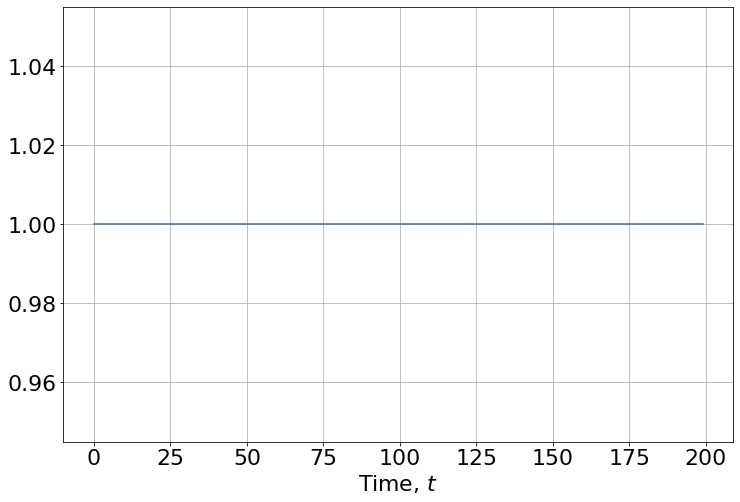

In [ ]:
plot_ts(constant_ts)

So far, we have not seen anything really new. However, now we are in position to calculate the autocorrelation and cross-correlation of this signal. We can calculate the autocorrelation using the _correlate_ function from numpy. However, numpy has no inbuilt function for partial autocorrelation, so we will use the statsmodels library for this (using the _pacf_ function) later on in the lecture. 

Note that we are passing the numpy _correlate_ function with the same time series twice. This tells the function that it needs to calculate the autocorrelation function. If you input different time series, it will simply calculate the cross-correlation between them.

In [ ]:
ACF = np.correlate(constant_ts, constant_ts, mode='full')

Now that we have the autocorrelation function, it is a good idea to also create a function which allows us to visualize it. We do this next. Note that we need to fix 

In [ ]:
def plot_ACF(ACF):
    plt.plot(range(-int(len(ACF)/2), int(len(ACF)/2)+1), ACF)
    plt.xlabel('Autocorrelation lags')
    plt.ylabel('ACF')
    plt.grid(True)
    plt.show()

Finally, we can call this function to plot the autocorrelation function we just calculated for the constant time series.

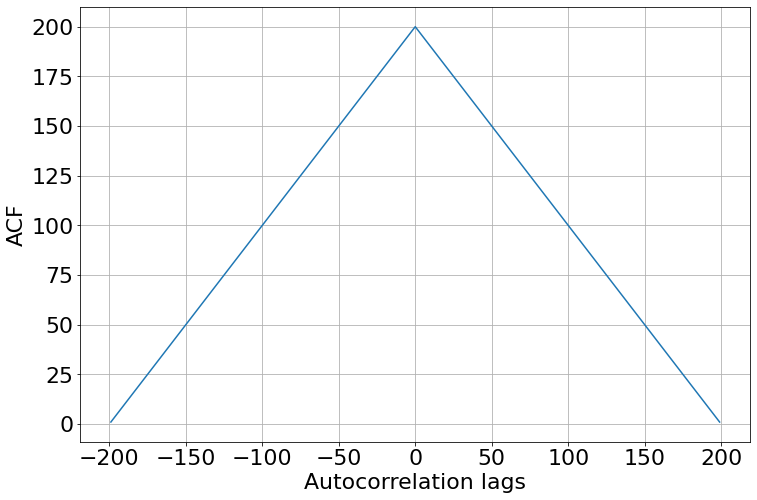

In [ ]:
plot_ACF(ACF)

Some things should be immediately clear here. The autocorrelation has a symmetric output (i.e. on either side of the zero-th lag it looks exactly the same). Consequently, the signal's autocorrelation peaks at a lag of 0, i.e. when both signals have perfect overlap. As the overlap reduces, the autocorrelation value goes down. The monotonic decrease with no spikes indicates that there is no periodic component to the time series which is hardly surprising as the time series is a constant value.

What happens if instead of a constant time series, we take a linearly rising time series. While this series has a trend, it does not have any periodic component either, and therefore the autocorrelation should be a monotically decreasing function again. Let's verify this before moving on to more interesting time series.

Note that we use the _arange_ function from numpy to generate a monotonically increasing time series.

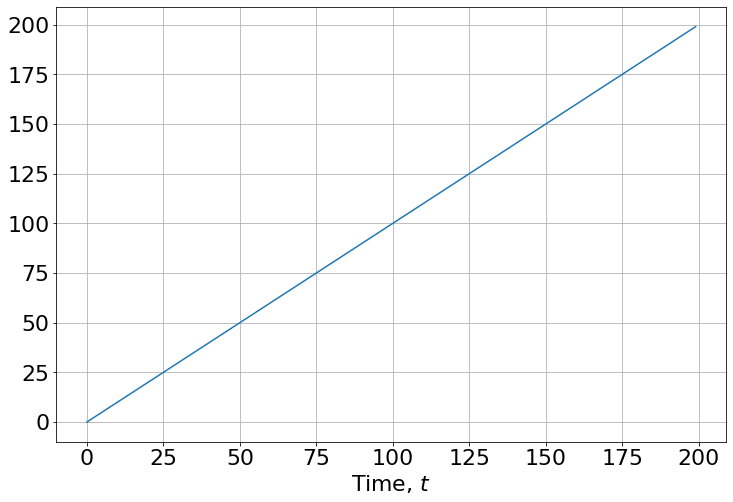

In [ ]:
linear_ts = np.arange(200)
plot_ts(linear_ts)

And now, as before, we can use our _plot_ACF_ function to plot out the ACF of the linear_ts we have defined above.

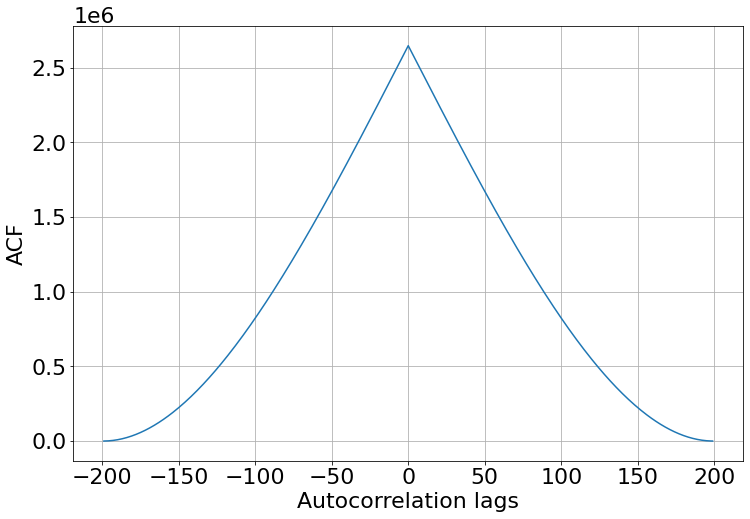

In [ ]:
plot_ACF(np.correlate(linear_ts, linear_ts, mode='full'))

The shape of the ACF is a bit different than before, but the overall pattern remains the same which verifies our original hypothesis. Also note how we stacked multiple commands into a single line of code there. Calling a function and passing it the output of another function is fairly common practice in Python, which allows you to achieve a lot without writing lots of lines of code.

If you are interested in judging the predictive power of past values, then you need to instead calculate the partial autocorrelation of the function, which has a more sparse representation. We use the _statsmodels_ library for this.


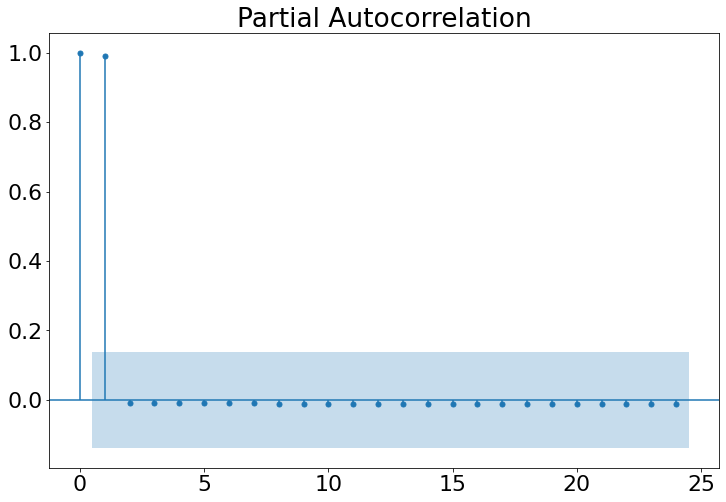

In [ ]:
sm.graphics.tsa.plot_pacf(linear_ts)
plt.show()

The partial autocorrelation funciton (or PACF) clearly shows that the value of the time series with one lag describes the time series almost perfectly. This makes intuitive sense as we had created an artificial linearly rising time series. The concept is more general however. In time series analysis, PACF plots are often used to determine the order of the AR process, i.e. how many lags in the past need to be used to describe the future evolution of a time series. In this case, we have what we call an AR(1) process.

Note that you can also calculate the ACF using the _statsmodels_ library as well (which is also shown below).

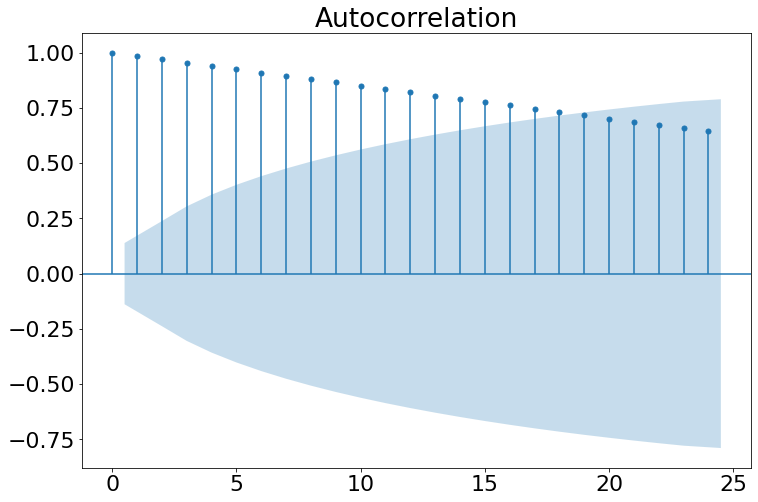

In [ ]:
sm.graphics.tsa.plot_acf(np.arange(200))
plt.show()

Notice the difference between the ACF and the PACF? While the partial autocorrelation is extremely sparse (i.e. only one significant lag is present), the autocorrelation signal is much more spread out in terms of lags.

Furthermore, you will also notice that the ACF's calculated by numpy and statsmodels are quite different. There are a few reasons for this:
1. _statsmodels_ gets rid of one symmetric half of the ACF as it contains no new information; furthermore it also limits the amount of lags it shows which can be overridden using the _lags_ argument.
2. _statsmodels_ uses the correlation function of _numpy_ under the hood, but adds post-processing (mostly normalization) on top of it. This is done to ensure that the ACF makes sense from a statistical perspective.

Now, let's look at a more interesting signal as our time series: a simple sinusoid. This sinusoidal time series does not have a trend (i.e. its mean value remains the same over time), but there is a strong periodic component. Let's create and plot our sinusoidal signal first.

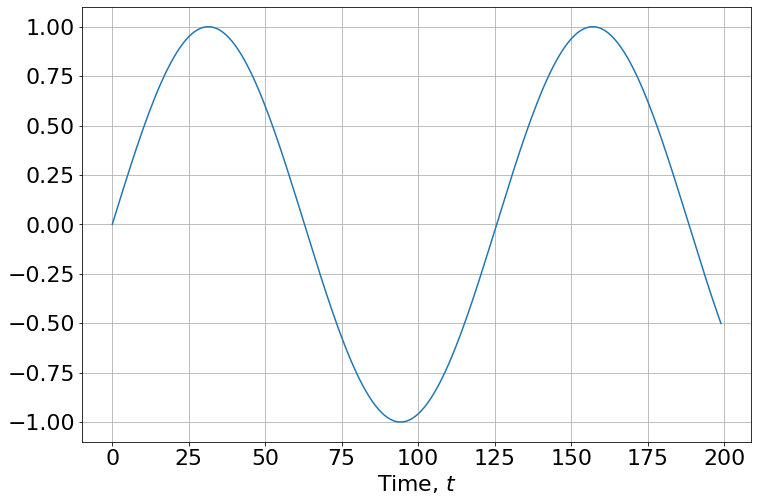

In [ ]:
sin_ts = np.sin(np.arange(0, 10, .05))
plot_ts(sin_ts)

Now we can calculate the autocorrelation function of the sinusoid as before.

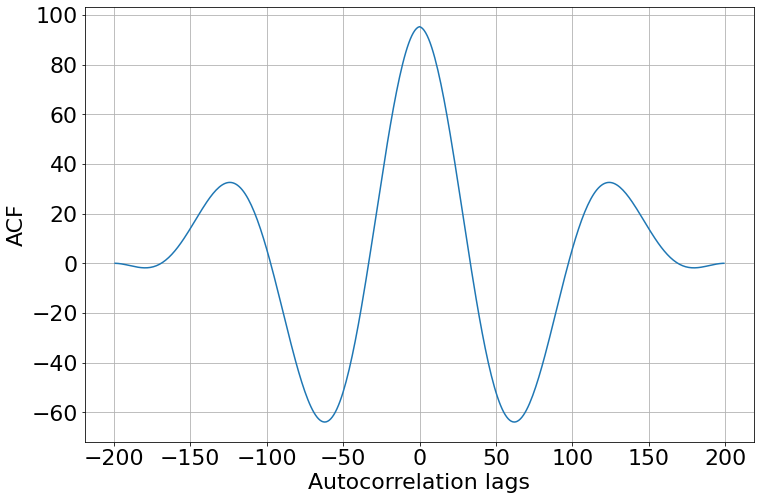

In [ ]:
plot_ACF(np.correlate(sin_ts, sin_ts, mode='full'))

This looks more interesting than the ACF of linear or constant time series. The peaks in the autocorrelation represent potential periodicity in the data (the lags are typically counted from the center point). You can quickly verify this for the sinusoid. It is easy to see that the sinusoid repeats with a period of about 125 time steps. The peaks at around the 125th lag in the ACF plot reflect this.


This information about the periodicity in the signal can be used as a rough first measure of which points can be used to predict the future. For time series where the partial autocorrelation function coefficients do not drop off quickly (as in the case of a sinusoid), the data might exhibit nonlinear phenomena. One way to deal with is to difference the data and analyze the differenced data for correlations.

In reality, we will usually encounter signals which are much, much more complex than pure sinusoidal waves. A mixture of sinusoids of different frequencies is a step in this direction. Such a time series is a good approximation of time series which exhibit periodicity on multiple time scales, such as solar energy production in buildings (where there is a diurnal and annual periodicity) as well as energy demand in buildings (where we have diurnal, weekly and annual periodicity).


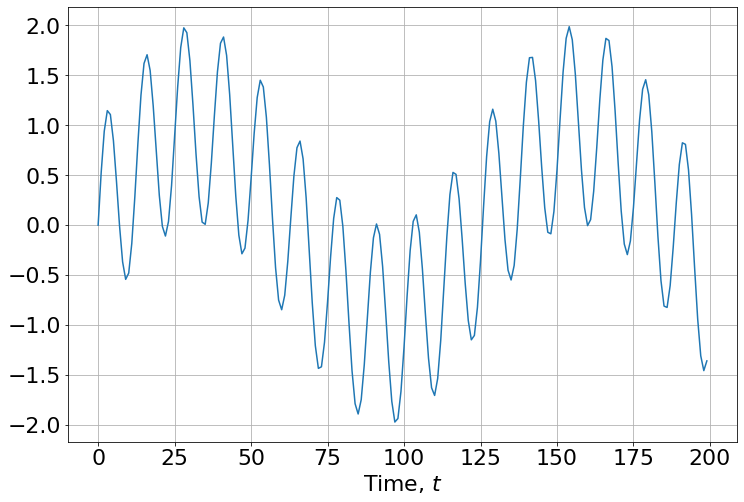

In [ ]:
mixed_ts = np.sin(np.arange(0, 10, .05)) + np.sin(np.arange(0, 100, .5))
plot_ts(mixed_ts)

Now, we can calculate the ACF of the mixture of sinusoids as before. What we expect is to see the two different periodicities in the ACF clearly.

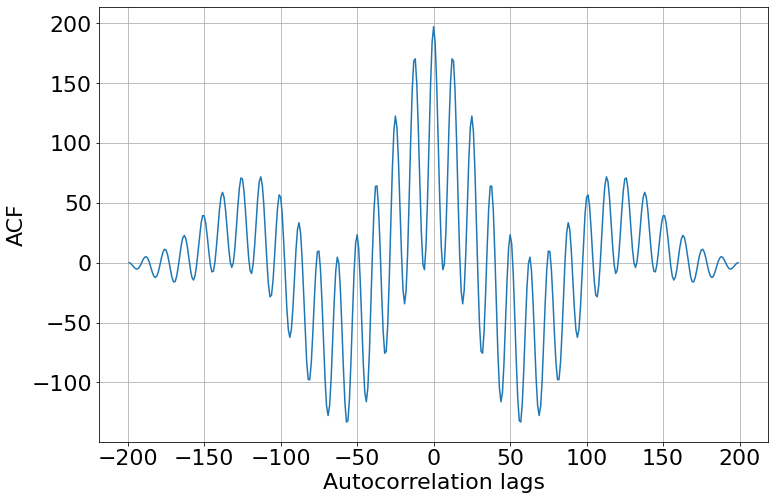

In [ ]:
ACF = np.correlate(mixed_ts, mixed_ts, mode='full')
plot_ACF(ACF)

And there you have it! Using the ACF, you can clearly see that there are at least two timescales at which there is periodicity in the signal (as before, you can verify these by counting the lags at which you have peaks in your autocorrelation time series).

In addition to being composed of different frequencies (manifesting as different periodicities in the data), time series are also corrupted by different types of noise. There can be many sources and types of noise in our observations. However, in practice this noise is often modelled according to the [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution). We can analyze such a noise time series itself to see how its autocorrelation would look like in practice.

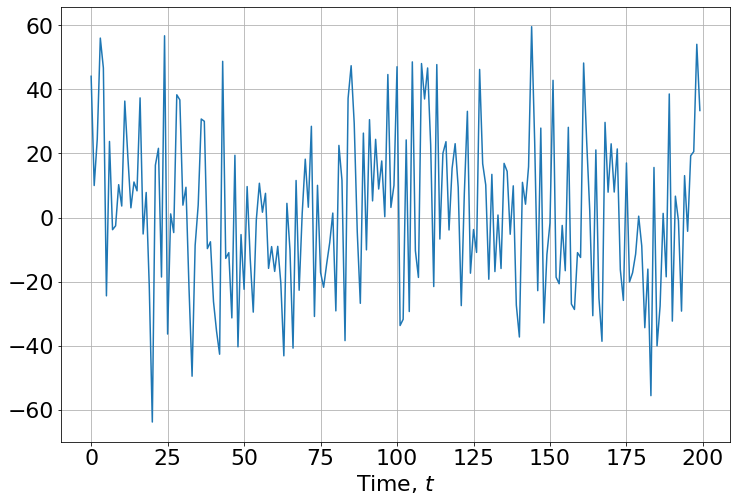

In [ ]:
np.random.seed(0)
noise_ts = np.random.normal(0, 25, 200)
plot_ts(noise_ts)

As you would expect, Gaussian noise does not seem to have a discernible trend or periodicity to it. The random seed setter is meant to ensure reproducibility. Try the code with the same seed value for multiple runs and then change it to a different value to see this in action. Next, we calculate the ACF of this noise time series, even though we do not expect to see a strong autocorrelation peak anywhere.

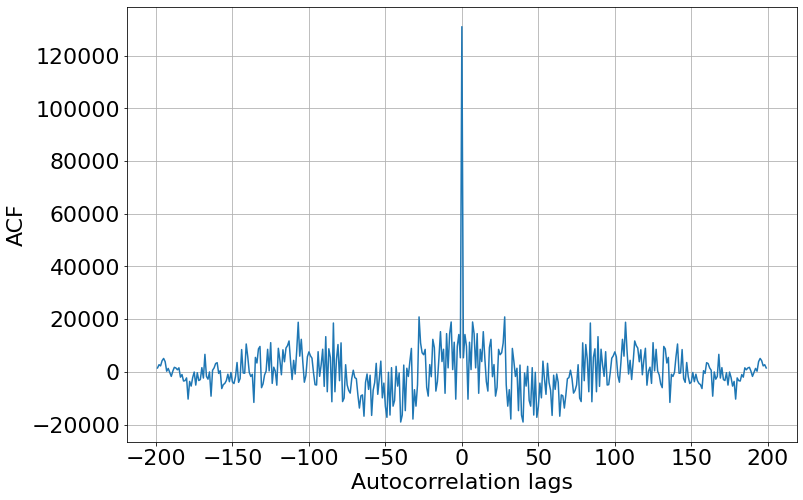

In [ ]:
plot_ACF(np.correlate(noise_ts, noise_ts, mode='full'))

As expected the autocorrelation of a noise signal is high only at the $0^{th}$ lag. Everywhere else it is close to 0. Theoretically, it should be 0, but some spurious correlations exist because of the finite duration of the time series. 

### Decomposition analysis



A more intuitive view of time series analysis includes decomposing a time series into its constituents: a trend component, seasonality and noise. Sometimes, a cyclical component is added as well. However, there is no single way that these components can be estimated  a large and a large variety of algorithms have been proposed for time series decomposition (although most involve some form of filtering and/or curve fitting). 

In this lecture, we begin with using the statsmodels library to estimate the time series components. First, let's import the necessary libraries.

In [ ]:
from statsmodels.tsa.seasonal import STL

To run the seasonal decomposition, we create (yet another) synthetic signal which is a combination of a periodic sinusoid and a linear trend.

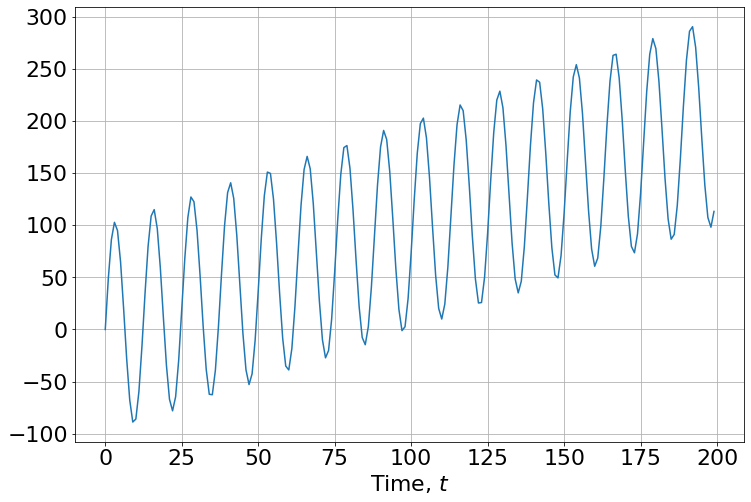

In [ ]:
rising_sin_ts = 100 * np.sin(np.arange(0, 100, .5)) + linear_ts
plot_ts(rising_sin_ts)

We can use the seasonal_decompose function from statsmodels, however this model requires a period to be defined by the user. We can do this easily using the ACF though (alternatively you can also try to determine this directly via the time series))!

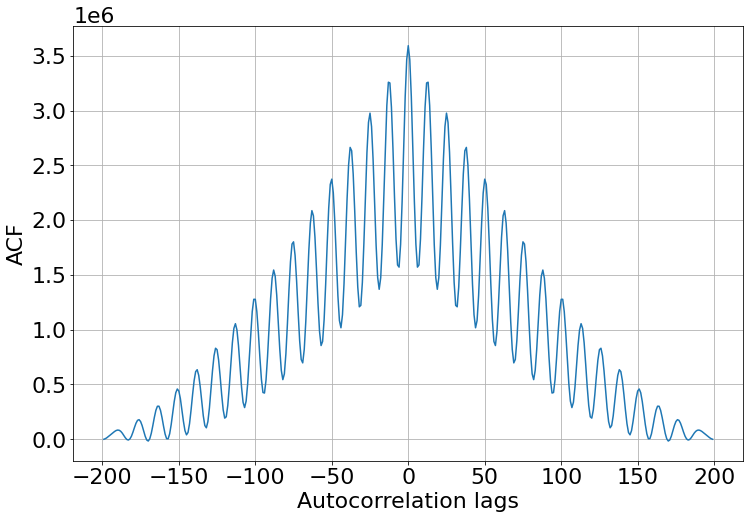

In [ ]:
plot_ACF(np.correlate(rising_sin_ts, rising_sin_ts, mode='full'))

The period seems to be around 12 or 13, which we use in the next cell.

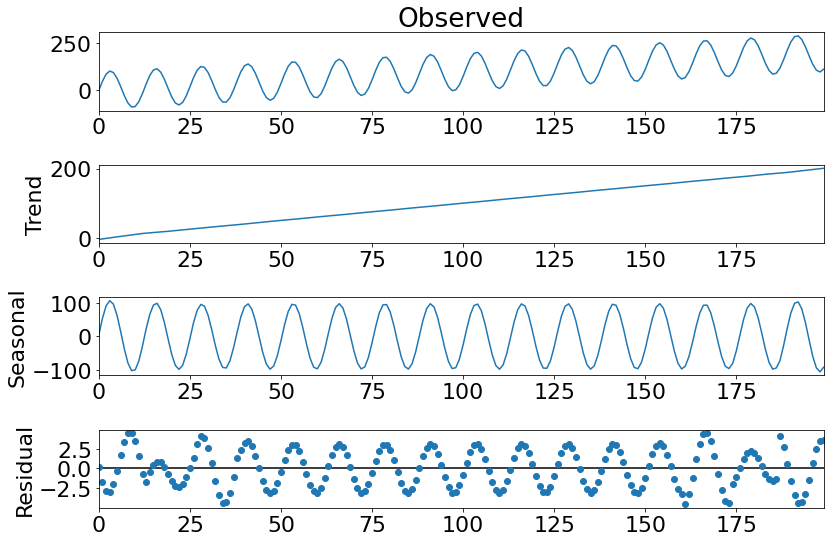

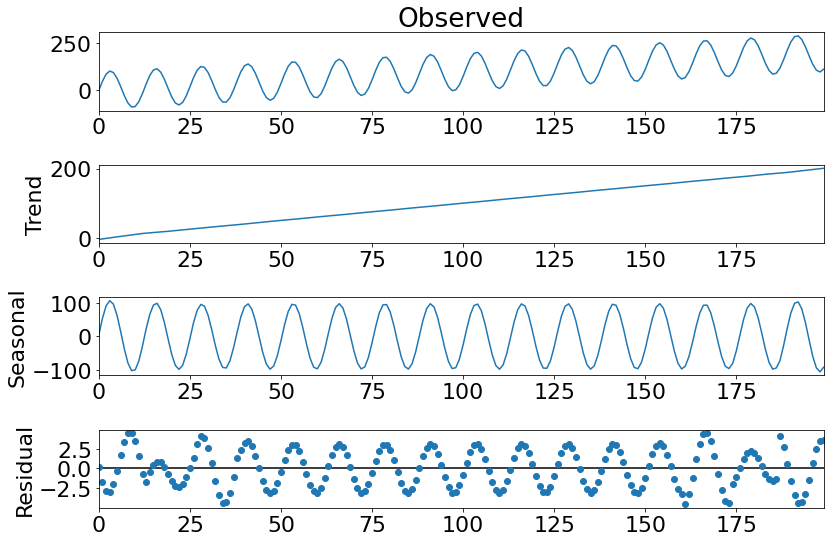

In [ ]:
result = STL(rising_sin_ts, period=13).fit()
result.plot()

And, just like magic, we have retrieved the seasonal and trend components (along with some residuals popping up due to estimation errors).

#### Creating scatter plots

In addition to looking at the ACF and the decomposition, we can also look at the scatter plot of the time series with its one-step lag. We do this here for both the linearly rising time series (linear_ts) and the noise time series (noise_ts).

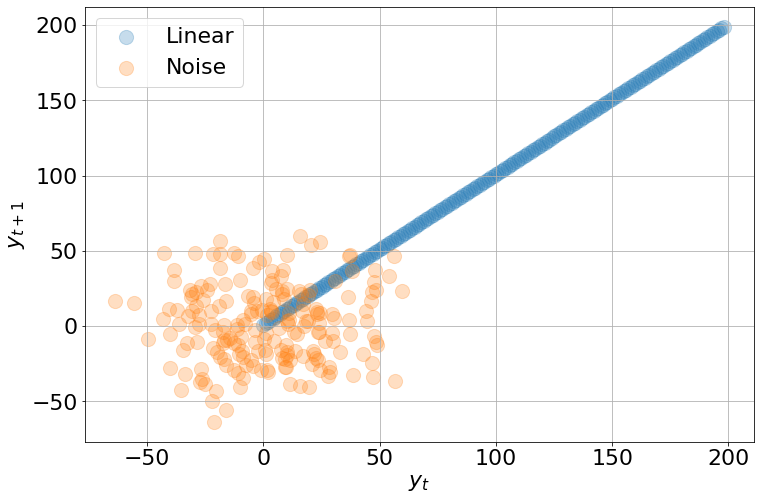

In [ ]:
plt.scatter(linear_ts[0:-1], linear_ts[1:], s=200, alpha=.25, label='Linear')
plt.scatter(noise_ts[0:-1], noise_ts[1:], s=200, alpha=.25, label='Noise')
plt.xlabel('$y_t$')
plt.ylabel('$y_{t+1}$')
plt.grid(True)
plt.legend()
plt.show()

There is an obvious relationship between the linear time series lagged by one time-step and its future values, as you would expect. On the other hand, the noise time series has almost no relationship with its ownself from one time step ago, i.e. the value of the signal at time step 0 has no predictive power for the value at time step 1.

In a prediction task, this information can prove to be critical.

#### Exercises
1. How does the length of the autocorrelation function relate to the input signal length?
2. Why does the autocorrelation function tapers off.
3. What happens to the autocorrelation function as you increase or decrease the length of the (noise) signal?
4. Statsmodels includes more than one decomposition algorithms. Do you understand the difference between these?
5. BONUS question. Fourier Transform (FT), as mentioned above, is another popular way of determining periodicity in data. A problem with the FT is that it loses all temporal information (so for signals where the frequency component is changing over time, you cannot get this information from the FT). Short Time Fourier Transform (STFT) is one way of dealing with this (the wavelet transform is another). Use [this library](http://librosa.github.io) to create the STFT for the noise and sinusoidal time series, discussed above. Explore the different function arguments and how they influence the output.

### Understanding the influence of exogenous variables
In addition to the autoregressive component in a signal, exogenous variables frequently influence the trajectory of a time series. This is particularly the case for energy data which is, in large part, dependent on user behaviour and ambient conditions. Renewable energy sources, such as solar and wind, for instance, largely rely on weather conditions. Electricity demand, likewise, varies strongly with user behaviour, ambient conditions and even calendar events (weekend vs. weekday, public holiday or not). 

As before, we analyze this on a simulated dataset to get the general idea. Here, we create two linearly increasing datasets. However, we corrupt one of them with some additive Gaussian noise. Such a relationship between two variables is commonly seen in many cases in energy. For instance, in many cases energy demand rises sharply with rising and/or falling ambient temperature (to cope with increasing cooling or heating demand respectively).

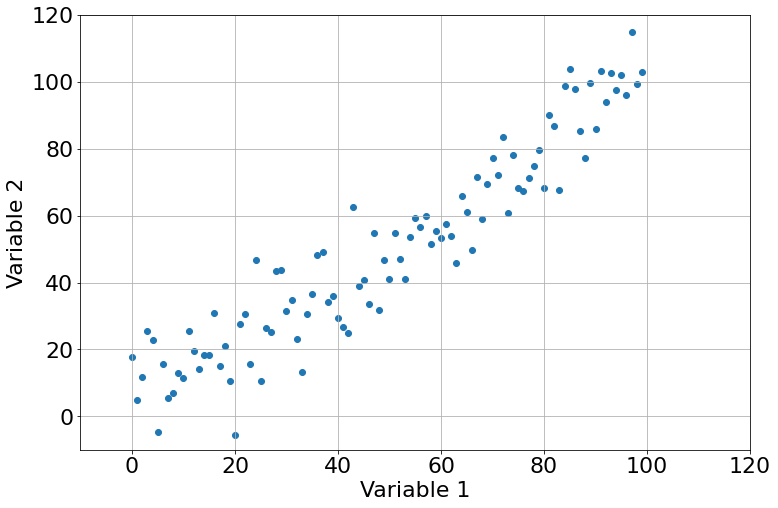

In [ ]:
np.random.seed(0)
signal1 = np.arange(100)
signal2 = np.arange(100) + np.random.normal(0,10,100)
plt.scatter(signal1,signal2)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)
plt.xlim(-10, 120)
plt.ylim(-10, 120)
plt.show()

It seems that, despite the noise we introduced, there remains a substantial correlation between the two time series. As one variable increases, so does the other. One way to quantify this relationship is with the [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). 

In [ ]:
np.corrcoef(signal1, signal2)

array([[1.        , 0.94129622],
       [0.94129622, 1.        ]])

The Pearson's correlation coefficient can theoretically take a value between -1 and +1, with -1 showing perfectly anti-correlated signals, +1 showing perfectly correlated signals and 0 showing no relationship between the two. A strong positive correlation implies that as the value of one signal increases, the other variable's value also increases. 

The correlation coefficient in this case is quite high at 0.94, which shows a very strong tendency for the two signals to move in tandem. This is hardly surprising, as they were both derived from the same linearly rising signal.

Note that correlation does not imply causation, and even though we use correlations to predict the future, it is an inexact science. Not convinced? Take a look [here](https://tylervigen.com/page?page=1) to understand spurious correlations such as how Nicholas Cage appearing in movies has a pretty high correlation with people drowning in pools.

Now, let's replace the Gaussian noise by a more interesting noise signal. In this case, we choose a signal dependent noise signal to contaminate the second signal as before.

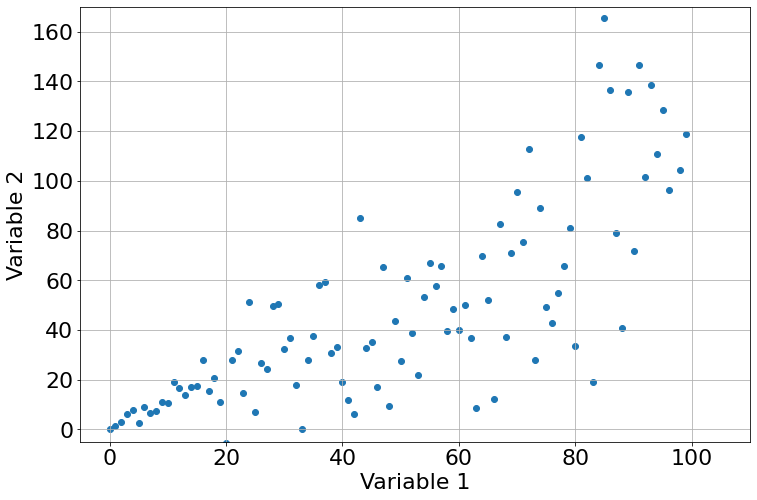

In [ ]:
np.random.seed(0)
signal1 = np.arange(100)
signal2 = np.arange(100) + np.random.normal(0, .5, 100) * np.arange(100)
plt.scatter(signal1, signal2)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)
plt.xlim(-5, 110)
plt.ylim(-5, 170)
plt.show()

In [ ]:
np.corrcoef(signal1, signal2)

array([[1.        , 0.77799064],
       [0.77799064, 1.        ]])

The changes we have made to siganl2 have reduced the correlation coefficient considerably (from .94 to .78). More importantly, the relationship is not as clear as before anymore, and the second signal shows greater dispersion with increasing x-values (this is known as heteroscedasticity i.e. the variability of different sub-populations are different). 

The difference between this and the previous case is that here we have introduced signal dependent noise, i.e. as the signal intensifies the noise levels are raised as well. This is often the case in many real world processes, where for instance at higher levels of operation noise levels increase due to measurement or process artifacts.  

Finally, let's see how correlation works where the input and output variables have a more complex, non-linear relationship.

In [ ]:
np.random.seed(0)
signal1 = np.arange(-10, 10) 
signal2 = np.arange(-10, 10) ** 2 + np.random.normal(0, 5, 20)
plt.scatter(signal1, signal2)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)
plt.show()

In [ ]:
np.corrcoef(signal1, signal2)

array([[ 1.        , -0.24115522],
       [-0.24115522,  1.        ]])

So, even though the two variables are clearly linked quadratically, the correlation coefficient comes out very low. This is because the Pearson's correlation coefficient is only valid for linear relationships as you can see here. For nonlinear relationships, Spearman's rank or Kendall's Tau coefficients can be used instead (under certain conditions).

#### Exercises
1. Fit a line (linear function) to the three plots we have created in this section using [this library](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)
2. Fit higher order functions (2 to 20) to the datasets using the same library (by changing the polynomial degree in the arguments). Explain what happens as you increase the order of the polynomial. Pay particular attention to regions where you have few data points and when you are extrapolating (i.e. predicting beyond what was observed).

## Intermezzo: visualization

It is also possible to make the scatter plots above - which are pretty bland - a bit more interesting. There are multiple ways to do this. One thing you can explore is the use of colors and sizes of the individual markers or points to represent higher dimensional data. This is because a scatter plot can only represent two axis at a time, however by modulating the color and size of individual data points, you can make your visualization more informative (without going to higher dimension plots).

For more details, check out the documentation of scatter plots [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)

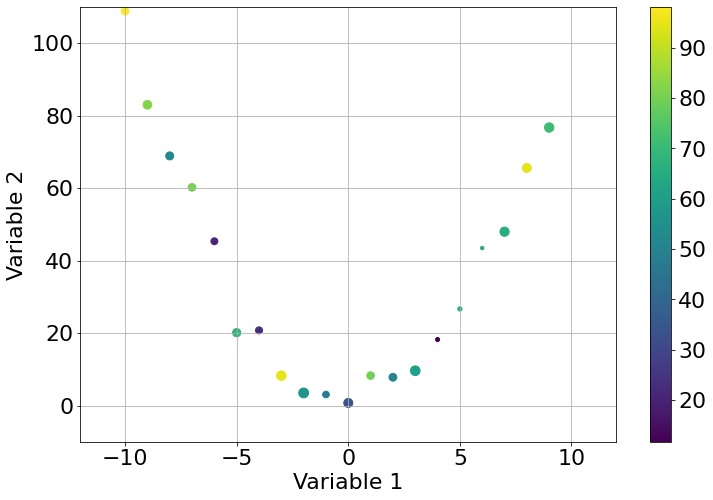

In [ ]:
np.random.seed(0)
sizes = np.random.uniform(10, 100, len(signal1))
colors = np.random.uniform(10, 100, len(signal1))
plt.scatter(signal1, signal2, s=sizes, c=colors)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.colorbar()
plt.xlim(-12, 12)
plt.ylim(-10, 110)
plt.grid(True)
plt.show()

It is also possible to highlight individual points in the plot. For instance, if you want to highlight certain data points, it is possible to do that easily too.

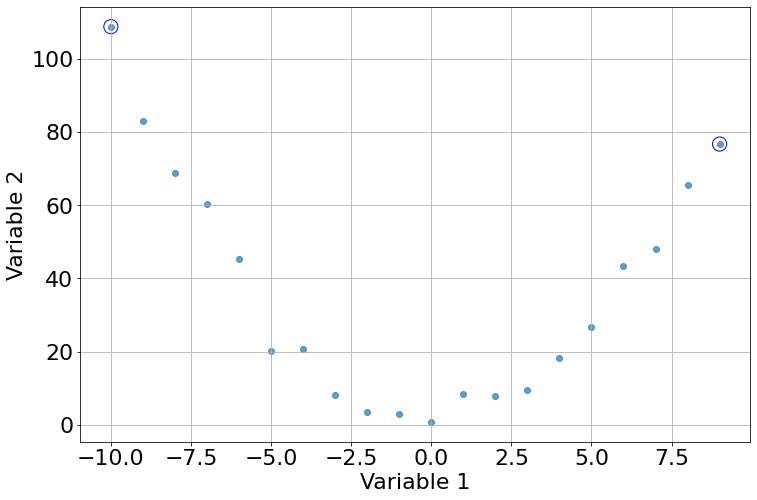

In [ ]:
idx = [np.argmin(signal1), np.argmax(signal1)]
highlight = np.array([signal1[idx], signal2[idx]]).T
plt.scatter(signal1, signal2, alpha=0.7)
plt.scatter(highlight[:, 0], highlight[:, 1],
            facecolors='none', edgecolors='b', s=200)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)
plt.show()

You can also explore a number of other plotting tools that are popular with the community such as [Seaborn](https://seaborn.pydata.org), [Bokeh](https://docs.bokeh.org/en/latest/) and Plotly, which we discussed in the previous lecture. However, these are not further discussed in this lecture.

***

# Lecture 3 Forecasting energy data

***

## Application to a real world signal

Whew, that was a lot of theory. From here on, we investigate how to apply these concepts to the real world, using the demand data we used in the previous lecture.

### ACF and PACF of electricity demand

In [ ]:
cons = pd.read_csv('LoadData.csv', header=None, prefix='House')

Let's define the sampling frequency (quarterly in this case), and the total number of days we have data for.

In [ ]:
number_days = 350
sampling_frequency = 96

In this lecture, we will mostly work with the aggregated load of all the buildings (uncomment the second line to work with the load for a single building).

In [ ]:
electricity = np.sum(cons[:], 1)
# electricity = cons.House1

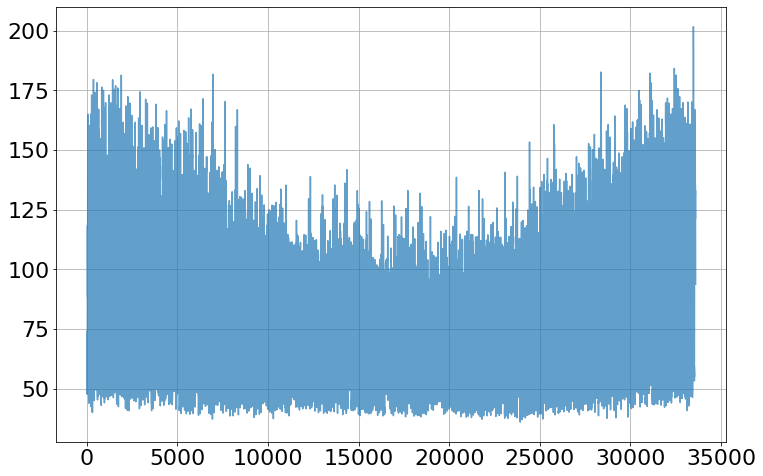

In [ ]:
plt.plot(electricity,alpha=.7)
plt.grid(True)
plt.show()

We can calculate the ACF and the PACF for this time series in exactly the same way as before using either the _numpy_ package or the _statsmodels_ library.

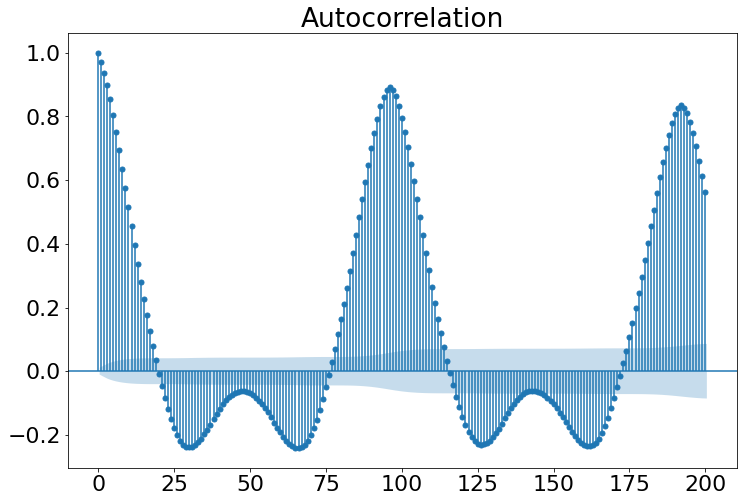

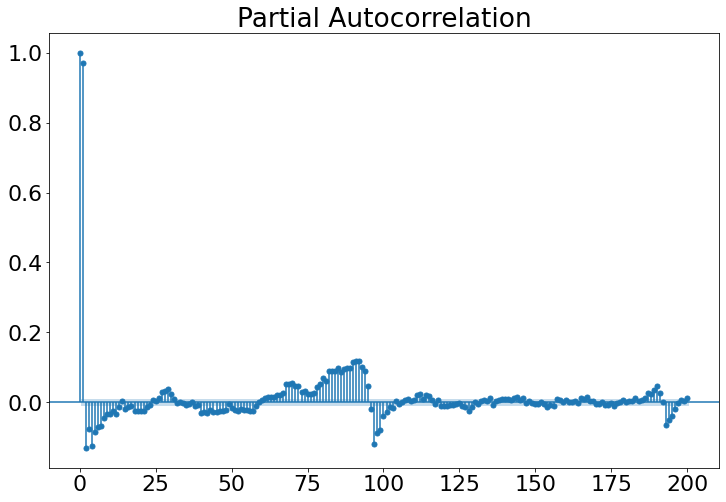

In [ ]:
sm.graphics.tsa.plot_acf(electricity, lags=200)
plt.show()

sm.graphics.tsa.plot_pacf(electricity, lags=200)
plt.show()


Both the ACF and the PACF show what we would expect. There is a strong diurnal component to the energy demand data in the buildings. The ACF shows clear harmonics around the 96th and 192nd lag. Likewise, the PACF is high at the 1st lag, but then has significant values later too (which indicate this is not a pure AR process). These other lags can also be used as features to predict the future values of the signal.

For now, we have used the entire time series to calculate its ACF and PACF. However, in practice, we seldom have the luxury of recording data for an entire year before analyzing it. Let's see how the ACF and PACF look like when we only have two weeks of data.

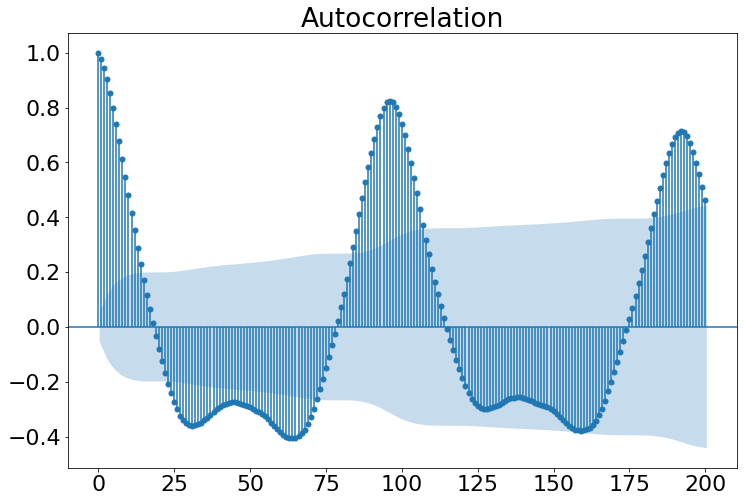

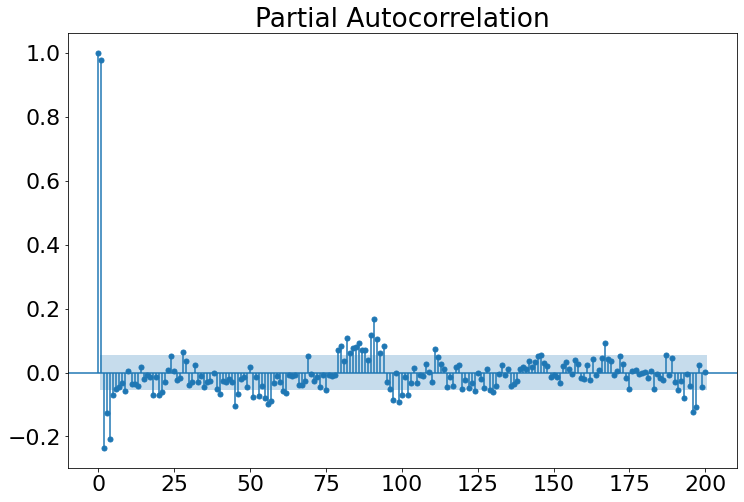

In [ ]:
sm.graphics.tsa.plot_acf(electricity[0:14*sampling_frequency], lags=200)
plt.show()

sm.graphics.tsa.plot_pacf(electricity[0:14*sampling_frequency], lags=200)
plt.show()


The curves look remarkably similar to the ones we saw earlier.

#### Exercises

1. Load the three datasets with missing values from lecture 2. Now create a time series which contains a value of 1 at the indices where the time series has a missing value (and takes a value of 0 elsewhere). Repeat this for all three time series with missing values. Now calculate the autocorrelation function for these new time series. What do you notice in the autocorrelation functions?
2. Decompose the time series into its components, as discussed earlier. What conclusions can you draw?

### Error metrics
Before we can make forecasts for the future, we need to define a performance metric: something to evaluate the quality of the forecast. In practice, there are hundreds of choices for error metrics available. For regression problems, such as the ones we are dealing with when we make forecasts for energy demand or production etc., the following error metrics are widely used:

1. Mean Error (ME)
2. Mean Absolute Error (MAE)
3. Mean Absolute Percentage Error (MAPE)
4. Mean Squared Error (MSE)
5. Rˆ2
6. Relative MAE (rMAE)

Most of these compare the actual measured signal against the forecast signal to describe how closely the two match up. The use of squared errors vs. absolute errors becomes important when high errors need to be weighted more (or less). rMAE is different in this sense since it compares the MAE of your forecaster against a benchmark (this can be, for instance, a naive baseline).

Scikit learn, a python library extensively used for machine learning in both industry and academia, has a number of these error metrics already implemented. You can use these for the remainder of this lecture, so check them out [here](https://scikit-learn.org/stable/modules/model_evaluation.html) (focusing on the regression error metrics for now).

In addition to these error metrics, some other distribution-based error metrics are sometimes used as well. These include:
1. Tests for normality of residuals using Q-Q (or normal probability plots) for visual and Shapiro-Wilk test for statistical analysis
2. Test for autocorrelation in residuals by using the Durbin-Watson statistic

These error metrics are only valid for point (or deterministic) forecasts. When we consider interval (or stochastic forecasts), other error metrics become more interesting as we forecast the entire probability distribution of the signal being forecast. These include, for instance, metrics such as reliability, resolution and uncertainty, which are sometimes combined into a single score (e.g. the Brier score). In practice, scenario forecasts are frequently used instead of probabilistic forecasts because they provide concrete trajectories of possible futures which can directly be used in optimization frameworks. This lecture only focuses on making point forecasts.

### Defining a baseline
The simplest forecast algorithm, and one that any 'smarter' algorithm has to outperform is the so-called persistence model. This model simply assumes that past values will be the same as future values with a given periodicity. Thus, for example demand on time step n will be the same as demand on time step n+k (where k is the periodicity of the data and can be daily, weekly, yearly etc.). In many cases, a persistence model works surprisingly well for periodic time series, such as electricity demand, solar PV production etc.

We start off this section on creating forecasting by making the persistence forecast for the electricity demand signal we discussed in a previous section. We make the forecasts on a one day time horizon, i.e. we assume that the data has a periodicity of one day. Note that this assumption was earlier validated by the ACF plots.

In [ ]:
prediction_persistence = np.array(electricity[0:96])
actual_demand = np.array(electricity[96:192])

Here, we have defined two variables: one to hold the actual demand on the second day, and another which holds the persistence forecast (by simply copying the values from the previous day). Now, we can visualize the predicted demand versus the actual demand for this particular day. This already gives us a first indication of how well the model is performing.

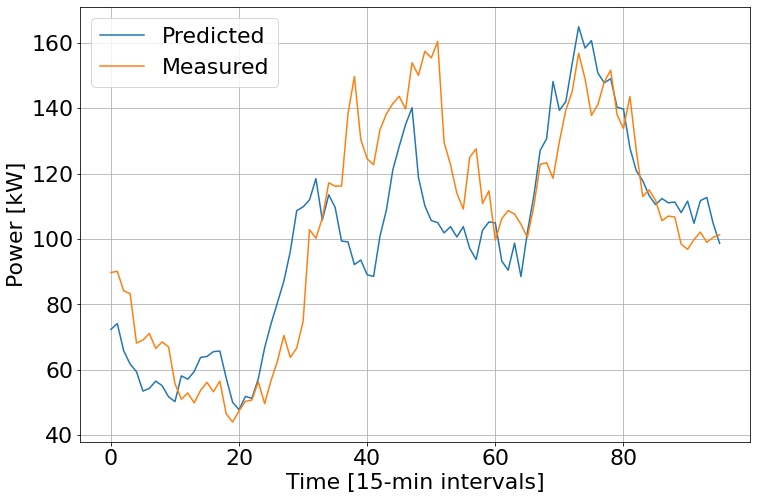

In [ ]:
plt.plot(prediction_persistence, label='Predicted')
plt.plot(actual_demand, label='Measured')
plt.xlabel('Time [15-min intervals]')
plt.ylabel('Power [kW]')
plt.legend()
plt.grid(True)
plt.show()

That is not too bad at a first glance. Before we try and improve this forecast, we can also plot out the predicted and measured variables in a scatter plot to see if there is anything strange going on. Ideally, we would want our predictions to lie very close to the unity slope line with 0 intercept (as shown here).

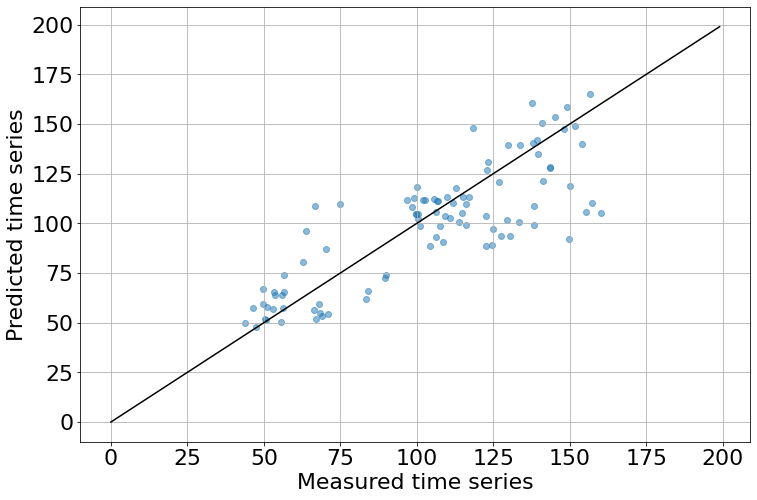

In [ ]:
plt.scatter(actual_demand, prediction_persistence, alpha=0.5)
plt.plot(range(200), range(200), 'black')
plt.grid(True)
plt.xlabel('Measured time series')
plt.ylabel('Predicted time series')
plt.show()

Fianlly, we can also plot a histogram of the error to see if it is distributed normally (i.e. follows a Gaussian distribution).

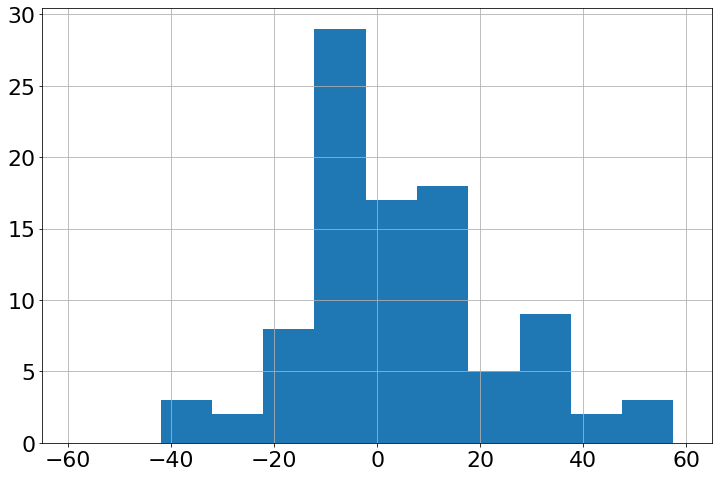

In [ ]:
error = actual_demand - prediction_persistence
plt.hist(error)
plt.grid(True)
plt.xlim(-65,65)
plt.show()

#### Exercises

1. In this section, we have made a forecast for just one day. In practice, this forecast needs to be created every day (and sometimes updated multiple times during each day as well). For instance, demand aggregators need to make a forecast for electricity demand everyday so they can participate in electricity markets. Rewrite the code above to create a one-day ahead persistence forecast for the whole year, storing the daily forecast for each day in a vector. Using this forecast, calculate the MAE and MAPE of this forecast, and the coefficient of determination.
2. Calculate the autocorrelation of the error time series (i.e. measured values - forecast values) calculated for the whole year. What do you infer from the results?
3. What insights do you draw based on the type of error the persistence forecast is making? Note that information in the following section on visualizing errors will also be useful to answering this question.

#### Visualizing errors

Note: this section can only be completed once you have calculated the (prediction) error for the whole year, and stored it in an array named _error_.

It is possible to reshape the error time series (stored as a 1D numpy array) into matrix form (aka a two dimensional array) form to better visualize if there are any systematic over- or under-predictions. These visualizations are similar to the exploratory analysis we did in the previous lecture when we first encountered this time series.

In [ ]:
# error2D = np.reshape(error, (days-1, samplingFreq))
# plt.imshow(error2D, cmap='magma')
# plt.colorbar()
# plt.xlabel('Time of day [15-min intervals]')
# plt.ylabel('Day of year')
# plt.show()

As before, now you can aggregate the error signal across different axis (i.e. average daily error or quarterly error). The average daily error is important to detect any systemic errors (e.g. on holidays or weekends etc.). The average quarterly (or hourly) error, on the other hand, helps detect over- and under-prediction over the course of the day. In cases where such a systemic error exists, the model is considered to be biased. This information is critical to judge the quality of your model, it can also help you improve your forecasts.

In [ ]:
# plt.plot(np.sum(error2D, 0))
# plt.xlabel('Time of day [15-min intervals]')
# plt.ylabel('Prediction error [kW]')
# plt.grid(True)
# plt.show()

We can also plot a boxplot to better visualize the distribution of these errors for every quarter hour of the day. The purpose of doing this is again to see if the forecasts are demonstrating high bias and/or variance at any time.

In [ ]:
# import pylab as plb

# plb.boxplot(error2D)
# plb.xlabel('Time of day [15-min intervals]')
# plb.ylabel('Prediction error [kW]')
# x = np.arange(0, 100, 20)
# labels = [0, 20, 40, 60, 80, 100]
# plb.xticks(x)
# plb.xticks(x, labels)
# plb.grid(True)
# plb.show()

The boxplot shows that the error variability is different during different hours of the day. The median error is close to zero throughout the day. However, the variability increases almost three-fold from its lowest value during the night to its highest value during the day.

We can do the same analysis to see if there is a strong seasonal component to the error signal, like the diurnal one we just investigated.

In [ ]:
# plt.plot(np.arange(2, 351), np.sum(error2D, 1))
# plb.xlabel('Day of year')
# plb.ylabel('Prediction error [kW]')
# plt.grid(True)
# plt.show()

### Training a linear model

Now that we have established a baseline persistence model, we will try to improve it with both machine learning and statistical methods next. 

First, we consider a classical ML method to create forecasts: linear regression. At this point, you have already fit a line to a bunch of points (in the section on understanding the influence of exogenous variables). Now we apply the same ideas to the electricity demand of these buildings. We will use the _scikit-learn_ library to create these forecast models.

Note that using exactly the same features and the same syntax, _scikit-learn_ lets you fit a number of different models to your problem. Depending on what you intend to do, you can choose among a number of different techniques such as linear models, SVMs, and tree-based methods. Here, we illustrate this principle by first extracting some features and then using them to fit a [linear model](https://en.wikipedia.org/wiki/Linear_regression).

We start off by extracting features from our raw training data. Note that our input data is in the form of a time series, and we wish to create a forecast for the future from it (i.e. for a future time that we have not observed data for yet). These features can be extremely complicated, or as in this case extremely simple. Here, we simply use the electricity demand data from the preceding two weeks to make a forecast for the future. Note that in machine learning, the input variables are often called x and the target or output variables y. The idea is generally to detect a pattern in our x values that allow us to forecast y. The model so trained is then used to make forecasts for x values that we did not see during the training phase (i.e. to make predictions for the future). The error metrics we discussed earlier evaluate how well we do on this task.

In [ ]:
def extract_features(load, currentIndex, featureCounter):
    xVar[featureCounter, :] = load[currentIndex - 96*7 : currentIndex]
    yVar[featureCounter] = load[currentIndex]
    return xVar, yVar

We start off by creating a linear model object using the sklearn library. Here, we only import the _linear_model_ from it, and then define an object called _lin_model_.

In [ ]:
from sklearn import linear_model
lin_model = linear_model.LinearRegression()

Now, unlike for the persistence model, we have to initialize a training dataset (containing both x variables and y variables) that will be used to tweak the parameters of this linear model. The _xVar_ in this case is a 2D matrix which contains the training data. The way to understand this is:
1. Each row a single training example.
2. Each column contains all the features associated with a single training example.

The _yVar,_ on the other hand, contains the thing we would like to predict. Therefore, it is a 1D array, where every single row is the output for the corresponding row in _xVar_.

More concretely, we define our _xVar_ as the historic data from the previous one week. So, one training example (e.g. first row of _xVar)_ would be the demand data from the previous two weeks (i.e. demand on all time steps from 0, 1, 2, ... 671). The _yVar_ in this case would be the demand data from the first time step after the training data finishes (i.e. demand on time step: 672). The next example would shift one time step forward (i.e. the x variable would go from time steps 1, 2, 3, ... 672, and the y variable will be the demand value on time step 673).


In [ ]:
xVar = np.zeros((number_days * sampling_frequency, 7 * 96))
yVar = np.zeros(number_days * sampling_frequency)

Now that we have initialized the training input and output variables, we can populate the actual x and y variables with actual data. We do this using the first 28 days of demand data using a sliding window approach. 

In [ ]:
feature_counter = 0
for i in range(7 * sampling_frequency, 28 * sampling_frequency):
    # Update feature vector for training
    xVar, yVar = extract_features(electricity, i, feature_counter)
    feature_counter = feature_counter + 1

print(feature_counter)

2016


Now that we have the training data variables created, we can use it to fit the linear model. 

Note that we only use the training examples corresponding to the feature_counter variable above. This is because even though we initialized the number of rows in _xVar_ and _yVar_ to be _number_days x sampling_frequency_ here, it is only going to be filled with _feature_counter_ examples at this point. The feature_counter variable is equal to 2016, which is in line with our expectations, i.e. after 4 weeks of observation data, we have training examples from 3 weeks (keeping in mind the one week of lead time between start of data collection and the first example's creation). This should be about 2000 training examples.

Fitting a linear model, or any other model from sklearn, is as simple as using the _fit_ function with the x and y variables. Some models also take additional arguments which can affect the output of a model.

In [ ]:
lin_model.fit(xVar[0:feature_counter, :], yVar[0:feature_counter])

LinearRegression()

Now that we have trained the linear model, we can create predictions for any x variable. Here, we create the prediction for our entire training dataset. Note that you can make a prediction for any specific training example (or really any input vector) by passing it as an input to _lin_model.predict_.

In [ ]:
prediction_linear = lin_model.predict(xVar[0:feature_counter, :])

While the methods we use here are typically referred to as black-box methods, it is possible to get insights on which features influence the forecast in one way or another. With a linear model, this is quite simple. You can simply do this by looking at the coefficients of the linear model:

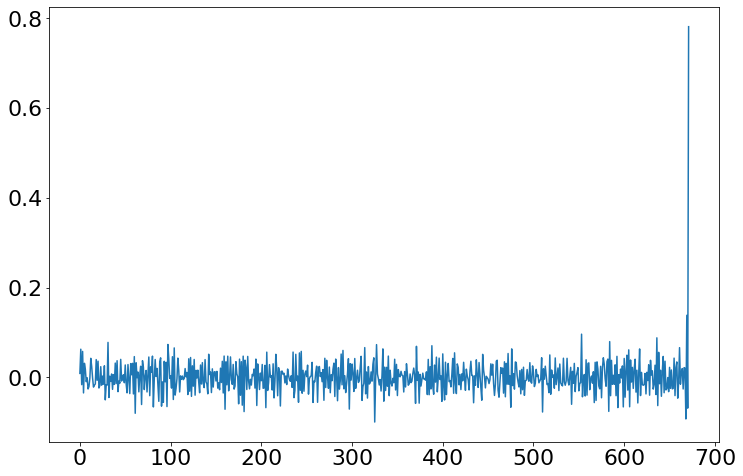

In [ ]:
plt.plot(lin_model.coef_)
plt.show()

As we have hundreds of features, it is a bit difficult to see which coefficient has the biggest impact. We can use argsort to calculate which variables are the most important in making this forecast. The most important feature is the value of demand on the previous lag.

Now you can use this model to create forecasts for the future as before with the persistence model.

#### Exercises

1. Create day-ahead forecasts for the whole year with the linear model (as you did previously for the persistence model). Assume that each day at midnight, you must create a forecast for the next 96 quarters. Compare the two methods (persistence and the linear model). Does the MAPE and R2 values of a linear model improve or worsen when compared with persistence? How does the rMAE look like? Is it greater than or smaller than 1?

2. Where we load the data, we aggregate demand for all houses and therefore make an aggregated forecast. Increasingly, with peer to peer concepts, it is becoming important to forecast energy demand in individual households. Rerun your code with data from a single household.

3. Estimate how the training time of your models scales as you increase the amount of training data. 

4. BONUS question. Can you do some feature engineering using the ACF and PACF plots, and use these as features instead to make your forecasts? (Recall that right now we are indiscriminately using the entire week of historic data to make forecasts, however this is not necessarily optimal). Alternatively, take a look into a method such as LASSO regression, which lets you remove features that are not relevant.

4. BONUS question. Can you implement the same predictor using the gradient boosting model from scikit-learn? How does this effect forecast accuracy?

#### [Hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization)
Typically in machine learning systems, we employ crossvalidation for hyperparameter tuning and also getting reliable estimates of how accurate our forecasts are. Here we have not done this as a linear model does not have any hyperparameters to optimize. However, it is definitely recommended for more complex models, such as neural networks etc. You can find more information about this [here](https://scikit-learn.org/stable/modules/cross_validation.html). 
Hyperparameter search is typically done using either [grid or random search](https://towardsdatascience.com/random-search-vs-grid-search-for-hyperparameter-optimization-345e1422899d). It is possible to do this easily with scikit-learn. Another option for hyperparameter optimization is to do Bayesian hyperparameter search, e.g. using [hyperopt](https://hyperopt.github.io). This technique can be more effective where getting objective function values can be expensive (e.g. with human test subjects), but will not be discussed further in this session.

#### [Overfitting and underfitting](https://en.wikipedia.org/wiki/Overfitting)
Of course, a data-driven model only works when the model has enough capacity to learn the relationship (i.e. no matter how much data you gather, you will not be able to learn a non-linear relationship with a linear model). This deals with the fundamental [overfitting](https://en.wikipedia.org/wiki/Overfitting) and underfitting challenge in machine learning, that you should familiarize yourself with before proceeding further. 
1. Underfitting is the case where your data is generated by a more complex process than your model is able to fit (e.g. fitting quadratic data with a linear model). This can be solved by using a more complex model. 
2. Overfitting, on the other hand, is when the model is too complex (i.e. has enough capacity to completely memorize the data) when compared with the data you are fitting. For example, fitting some points with a very high order polynomial function. This can be fixed by reducing the model capacity using regularization. In many cases, it is also possible to fix this by using more data.

#### [Regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics))
Regularization is used to reduce the generalization error by fitting a model to avoid overfitting. It does this by reducing the complexity of a model by imposing certain constraints on the learning problem. There are a number of regularization algorithms available, which include L2 regularization (which imposes smoothness constraints), L1 regularization (which imposes sparsity constraints), dropout (used with neural networks to dynamically reduce the capacity) and early stopping (also used with neural networks to ensure validation error does not deviate too much from training set error - a classic symptom of overfitting).

### Statistical methods - Facebook Prophet
Instead of using machine learning methods, it is also possible to use statistical techniques to create forecasts. These are often simpler to deploy, as they are specifically created for the types of problems we face in energy. However, at the same time, they can often underperform their ML based counterparts. Here, we look at using the [Prophet](http://facebook.github.io/prophet/) library by Facebook which provides an out of the box solution for forecasting time series in both Python and R. Note that for Prophet to work properly it requires both an index (ds) and the signal you're modelling (y). Here, we use the same dataset we were using before (i.e. the summation of all individual household loads) and add a time index to make it compatible with Prophet.

In [ ]:
index = pd.date_range(start='2012-01-01', periods = 4*24*350, freq = '15T')

df = pd.DataFrame({'ds': index, 'y': electricity})
m = Prophet()

As the first step, we fit the model to the data from the first 28 days in the dataframe (to keep it comparable to the other models discussed above).

In [ ]:
m.fit(df[0:sampling_frequency*28])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Initial log joint probability = -71.9414


In the next step, we create a future dataframe by specifying the periods as well as the sampling frequency.

In [ ]:
future = m.make_future_dataframe(periods=sampling_frequency, freq='15min')
future

,ds
0,2012-01-01 00:00:00
1,2012-01-01 00:15:00
2,2012-01-01 00:30:00
3,2012-01-01 00:45:00
4,2012-01-01 01:00:00
...,...
2779,2012-01-29 22:45:00
2780,2012-01-29 23:00:00
2781,2012-01-29 23:15:00
2782,2012-01-29 23:30:00


With the model and the future time horizon over which we need to make the forecast, we can easily create forecasts for the future as shown here.

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2779,2012-01-29 22:45:00,92.737274,75.954485,108.559785
2780,2012-01-29 23:00:00,89.115610,73.268316,104.614051
2781,2012-01-29 23:15:00,85.702176,68.641128,100.865141
2782,2012-01-29 23:30:00,82.434724,66.435090,99.303076
2783,2012-01-29 23:45:00,79.248146,62.765300,94.958500


It is possible to visualize the forecast along with the observed data and the prediction confidence intervals.

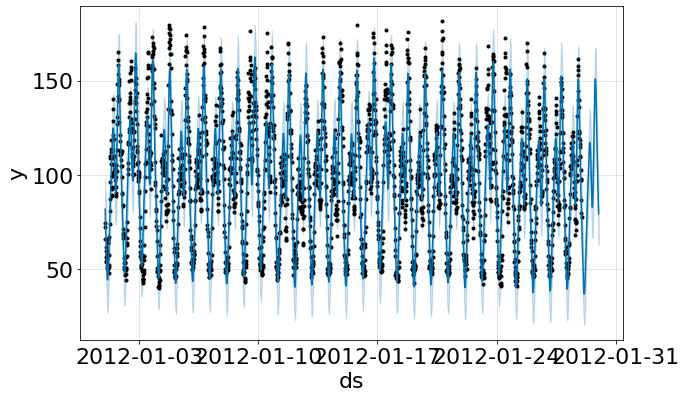

In [ ]:
fig1 = m.plot(forecast)

Whew! That's a lot of forecasters for a single time series. It is up to you to now calculate the error metrics for all the time series as we have discussed above, and decide which one works best for you! 

Before finishing the lecture, there is another neat trick that Prophet has under its sleeve: the ability to decompose a time series into its different components. These are the trend and different parts of the signal which have a seasonal component, in addition to the random component. Compare this with the decomposition you obtained with statsmodels.

For more details on time series analysis, Rob Hyndman's [blog](https://robjhyndman.com/hyndsight/) is a great place to get started.

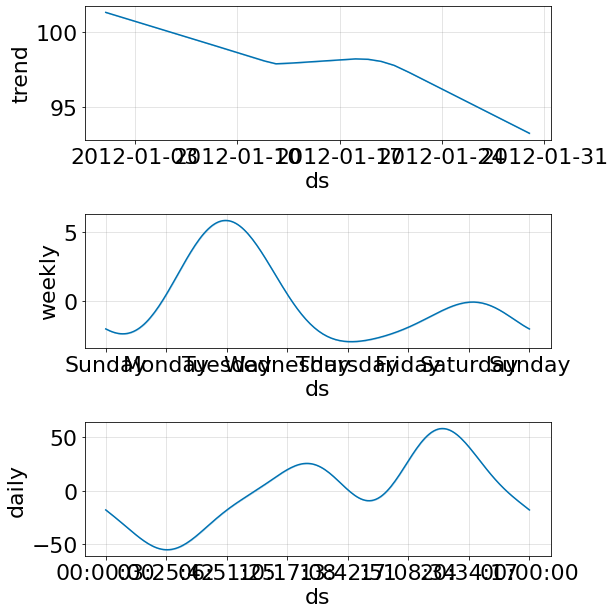

In [ ]:
fig2 = m.plot_components(forecast)

#### Exercises
1. Calculate the error metrics for day-ahead forecasts for all techniques considered in this lecture. What can you infer about the errors? 

In the end, remember that forecasting time series (well) is complex work. For some more insight on the subject, take a look at [this blog post](http://blog.drhongtao.com/2017/08/breakthrough-too-good-to-be-true-smoke-tests.html) from Prof. Tao Hong.

## Other matters of practical interest

While so far we have focused on forecast accuracy as the metric of choice (and there are a large number of choices here as well!), a number of other concerns exist in practice as well. Two of the most commonly encountered ones include:
1. [Computational complexity](https://en.wikipedia.org/wiki/Computational_complexity), or how the algorithm scales as we increase either the input data or the input dimensionality (i.e. adding new training examples or adding new features to the training examples). In computer science, this is usually measured using the Big-O notation, although many variants including small-o and big-$\Omega$ exist as well.
2. [Sample efficiency](https://research.zalando.com/welcome/mission/research-projects/sample-efficient-reinforcement-learning/), or how much data is required to create accurate forecasts. This refers to the errors caused by the uncertainty inherent in the process (which cannot be reduced by collecting more data) and the uncertainty because of the function approximation tool used (which can be reduced by collecting more data and/or using a different algorithm). 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b21ecfca-1024-46a4-860c-35a51c91b2b7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>